In [6]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
import pandas as pd

np.random.seed(42)
try:
    device_list = tf.config.get_visible_devices()
    tf.config.set_visible_devices(device_list[::2])
except Exception:
    print("Already initialized")
    pass

from datahelper.models.patch_network import PatchNet, OnlyPatches
from datahelper.datasets.records import DrivingRecord, CenterDrivingRecord
from datahelper.process.preprocessing import import_driving_log, find_records



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Already initialized


In [2]:
DATA_PATH = "/home/mattr/Desktop/udacity/CarND-Behavioral-Cloning-P3/training/data/"
DRIVING_FOLDERS = {'easy': 'drivingData', 'hard': 'drivingDataHard', 'john': 'johnsDrivingData'}

In [3]:
easy_driving_df = import_driving_log(DATA_PATH+DRIVING_FOLDERS['easy']+"/driving_log.csv", DATA_PATH)
print(len(easy_driving_df))
easy_driving_df.head(3)

3933


,center_img,left_img,right_img,steering_angle,throttle,brake,speed
0,/home/mattr/Desktop/udacity/CarND-Behavioral-C...,/home/mattr/Desktop/udacity/CarND-Behavioral-C...,/home/mattr/Desktop/udacity/CarND-Behavioral-C...,0.0,0.0,0.0,25.32430
1,/home/mattr/Desktop/udacity/CarND-Behavioral-C...,/home/mattr/Desktop/udacity/CarND-Behavioral-C...,/home/mattr/Desktop/udacity/CarND-Behavioral-C...,0.0,0.0,0.0,25.17072
2,/home/mattr/Desktop/udacity/CarND-Behavioral-C...,/home/mattr/Desktop/udacity/CarND-Behavioral-C...,/home/mattr/Desktop/udacity/CarND-Behavioral-C...,0.0,0.0,0.0,24.96740


In [4]:
easy_record = CenterDrivingRecord(easy_driving_df)

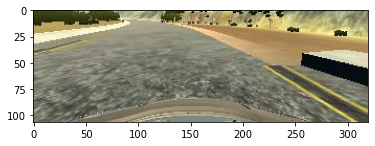

In [5]:
import matplotlib.pyplot as plt

plt.imshow(easy_record[0][0])

In [29]:
mynet = OnlyPatches(512, 3, kernel_size=5, n_classes=1)

In [30]:
mynet(easy_record[0:1][0])
mynet.summary()

Model: "only_patches_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           multiple                  614912    
_________________________________________________________________
activation_44 (Activation)   multiple                  0         
_________________________________________________________________
batch_normalization_44 (Batc multiple                  2048      
_________________________________________________________________
sequential_5 (Sequential)    (1, 5, 16, 512)           840192    
_________________________________________________________________
global_average_pooling2d_5 ( multiple                  0         
_________________________________________________________________
dense_5 (Dense)              multiple                  513       
Total params: 1,457,665
Trainable params: 1,450,497
Non-trainable params: 7,168
______________________________________

In [31]:
mynet(easy_record[0:2][0])

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-0.00096508],
       [-0.00089647]], dtype=float32)>

In [13]:
inputs, targets, _, _ = easy_record[:]


In [34]:
targets = targets[:, 1]

In [36]:
targets

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [40]:
tf.keras.losses.Huber?

Init signature: tf.keras.losses.Huber(delta=1.0, reduction='auto', name='huber_loss')
Docstring:     
Computes the Huber loss between `y_true` and `y_pred`.

For each value x in `error = y_true - y_pred`:

```
loss = 0.5 * x^2                  if |x| <= d
loss = 0.5 * d^2 + d * (|x| - d)  if |x| > d
```
where d is `delta`. See: https://en.wikipedia.org/wiki/Huber_loss

Standalone usage:

>>> y_true = [[0, 1], [0, 0]]
>>> y_pred = [[0.6, 0.4], [0.4, 0.6]]
>>> # Using 'auto'/'sum_over_batch_size' reduction type.
>>> h = tf.keras.losses.Huber()
>>> h(y_true, y_pred).numpy()
0.155

>>> # Calling with 'sample_weight'.
>>> h(y_true, y_pred, sample_weight=[1, 0]).numpy()
0.09

>>> # Using 'sum' reduction type.
>>> h = tf.keras.losses.Huber(
...     reduction=tf.keras.losses.Reduction.SUM)
>>> h(y_true, y_pred).numpy()
0.31

>>> # Using 'none' reduction type.
>>> h = tf.keras.losses.Huber(
...     reduction=tf.keras.losses.Reduction.NONE)
>>> h(y_true, y_pred).numpy()
array([0.18, 0.13], dtype

In [80]:
mynet.compile(loss=sign_loss, optimizer=tf.keras.optimizers.Adamax(learning_rate=5e-3), metrics=['mae'])

In [81]:
history = mynet.fit(x=inputs, y=targets, epochs=50, batch_size=32)

Epoch 1/50
123/123 [==============================] - 2s 10ms/step - loss: 0.1117 - mae: 0.0526
Epoch 2/50
123/123 [==============================] - 1s 10ms/step - loss: 0.0906 - mae: 0.0435
Epoch 3/50
123/123 [==============================] - 1s 10ms/step - loss: 0.0832 - mae: 0.0401
Epoch 4/50
123/123 [==============================] - 1s 10ms/step - loss: 0.0855 - mae: 0.0407
Epoch 5/50
123/123 [==============================] - 1s 10ms/step - loss: 0.0900 - mae: 0.0437
Epoch 6/50
123/123 [==============================] - 1s 10ms/step - loss: 0.0735 - mae: 0.0364
Epoch 7/50
123/123 [==============================] - 1s 10ms/step - loss: 0.0820 - mae: 0.0393
Epoch 8/50
123/123 [==============================] - 1s 10ms/step - loss: 0.0822 - mae: 0.0398
Epoch 9/50
123/123 [==============================] - 1s 10ms/step - loss: 0.0795 - mae: 0.0386
Epoch 10/50
123/123 [==============================] - 1s 10ms/step - loss: 0.0782 - mae: 0.0396
Epoch 11/50
123/123 [==================

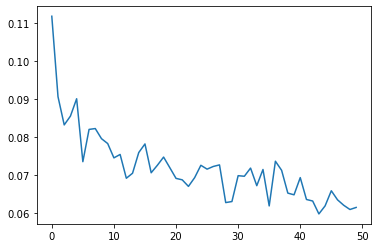

In [82]:
plt.plot(history.history['loss'])

In [83]:
sign_loss(mynet(inputs[:20]).numpy().flatten(), tf.constant(targets[:20]))

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0.24470201, 0.24470201, 0.24470201, 0.24470201, 0.0489404 ,
       0.0489404 , 0.0489404 , 0.0489404 , 0.0489404 , 0.0489404 ,
       0.0489404 , 0.0489404 , 0.0489404 , 0.0489404 , 0.0489404 ,
       0.0489404 , 0.0489404 , 0.0489404 , 0.0489404 , 0.0489404 ],
      dtype=float32)>

In [88]:
(mynet(inputs[:20]).numpy().flatten()*targets[:20])

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [85]:
targets[:20]

array([ 0.        ,  0.        ,  0.        ,  0.        , -0.112782  ,
       -0.3383459 , -0.4736842 , -0.5902256 , -0.6278195 , -0.6278195 ,
       -0.537594  , -0.2556391 , -0.09398497,  0.2631579 ,  0.4285714 ,
        0.4436091 ,  0.4436091 ,  0.4360902 ,  0.1541353 , -0.03759398],
      dtype=float32)

In [97]:
tf.function
def sign_loss(true_labels, prediction, l=5):
    mae = tf.keras.losses.MeanAbsoluteError()
    true_fn = l*mae(true_labels, prediction)-(l-1)*mae(true_labels, tf.zeros_like(true_labels))
    false_fn = mae(true_labels, prediction)
    func = tf.where(tf.less_equal(true_labels*prediction, tf.constant([0.0], dtype=tf.float32)), true_fn, false_fn)
    return func
    

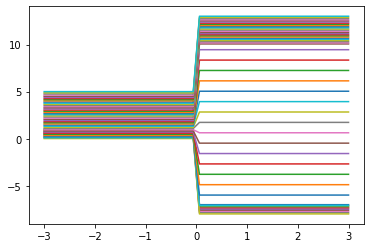

In [103]:
x = np.linspace(-3, 3, 50)
loss = lambda x, y: np.abs(x-y) if x*y>=0 else 5*np.abs(x-y)-4*np.abs(y)
plt.plot(x, sign_loss(tf.constant(x.reshape(-1, 1), dtype=tf.float32), -2*tf.ones_like(x.reshape(-1, 1), dtype=tf.float32)))

In [102]:
sign_loss(tf.constant(x, dtype=tf.float32), -2*tf.ones_like(x, dtype=tf.float32))

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([2.1836734, 2.1836734, 2.1836734, 2.1836734, 2.1836734, 2.1836734,
       2.1836734, 2.1836734, 2.1836734, 2.1836734, 2.1836734, 2.1836734,
       2.1836734, 2.1836734, 2.1836734, 2.1836734, 2.1836734, 2.1836734,
       2.1836734, 2.1836734, 2.1836734, 2.1836734, 2.1836734, 2.1836734,
       2.1836734, 4.7959185, 4.7959185, 4.7959185, 4.7959185, 4.7959185,
       4.7959185, 4.7959185, 4.7959185, 4.7959185, 4.7959185, 4.7959185,
       4.7959185, 4.7959185, 4.7959185, 4.7959185, 4.7959185, 4.7959185,
       4.7959185, 4.7959185, 4.7959185, 4.7959185, 4.7959185, 4.7959185,
       4.7959185, 4.7959185], dtype=float32)>